# Chapter 1 문자열을 사용한 작업
Working with Strings

<br></br>
## 1 토큰화
텍스트를 token이라는 작은 부분으로 분할

### 01 Sentence - tokenize
sent_tokenize() : text 를 문장으로 나누기

In [1]:
# 문장부호를 기준으로 문장을 나눈다
from nltk.tokenize import sent_tokenize

text=" Welcome readers. I hope you find it interesting. Please do reply."
print(sent_tokenize(text))

[' Welcome readers.', 'I hope you find it interesting.', 'Please do reply.']


### 02  Word tokenize
word_tokenize() : 문장을 단어로 나누기

1) TreebankWordTokenizer : Treebank를 활용해서 정교하나 느리다

2) RegexpTokenizer(정규식활용) - WordPunctTokenizer - WhitespaceTokenizer : 속도 빠르지만 결과는 거칠다

#### 1) TreebankWordTokenizer 를 사용한 토큰화
TreebankWordTokenizer()

In [2]:
# Penn Treebank Corpus 에 따른 기준을 사용하여, 문법별로 나눈다
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()
print(tokenizer.tokenize("Have a nice day. I hope you find the book interesting"))

['Have', 'a', 'nice', 'day.', 'I', 'hope', 'you', 'find', 'the', 'book', 'interesting']


In [3]:
print(tokenizer.tokenize(" Don't hesitate to ask questions"))

['Do', "n't", 'hesitate', 'to', 'ask', 'questions']


#### 2) RegexpTokenizer 를 사용한 토큰화
RegexpTokenizer("정규식")

In [4]:
# re 모듈을 통해서도 같은 결과를 도출가능
# re.findall() , re.split() 함수로도 구현이 가능하다
import re
sent = " She secured 90.56 % in class X . She is a meritorious student"
re.findall('[A-Z]\w+', sent)

['She', 'She']

In [5]:
# RegexpTokenizer : 정규식을 기준으로 token 변환
from nltk.tokenize import RegexpTokenizer
capt = RegexpTokenizer('[A-Z]\w+')  # 대문자로 시작하는 단어를 기준으로 tokenize
capt.tokenize(sent)

['She', 'She']

In [6]:
# WordPunctTokenizer : white-space를 정규식으로 token 생성 (빠르다)
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
print(tokenizer.tokenize(" Don't hesitate to ask questions"))

['Don', "'", 't', 'hesitate', 'to', 'ask', 'questions']


#### 3) BlanklineTokenizer/ WhitespaceTokenizer 를 사용한 토큰화
Whitespace를 기준으로 Token 생성하기

In [7]:
# 파이썬 기본함수를 통해서도 같은 결과를 출력가능하다
sent=" She secured 90.56 % in class X . She is a meritorious student"
print(sent.split())     # 기본 분할기준은 WhiteSpace
print(sent.split(' '))  # 명시적 표시

['She', 'secured', '90.56', '%', 'in', 'class', 'X', '.', 'She', 'is', 'a', 'meritorious', 'student']
['', 'She', 'secured', '90.56', '%', 'in', 'class', 'X', '.', 'She', 'is', 'a', 'meritorious', 'student']


In [8]:
from nltk.tokenize import WhitespaceTokenizer
sent=" She secured 90.56 % in class X . She is a meritorious student"
print(WhitespaceTokenizer().tokenize(sent))

['She', 'secured', '90.56', '%', 'in', 'class', 'X', '.', 'She', 'is', 'a', 'meritorious', 'student']


### 03 Token's index tuple
token의 offset index 값을 반환

In [9]:
# string_span_tokenize()    cf) (30, 31) '\n.' (32, 34) 로 2개로 인식

sent=" She secured 90.56 % in class X \n. She is a meritorious student\n"
from nltk.tokenize.util import string_span_tokenize
print(list(string_span_tokenize(sent, " ")))

[(1, 4), (5, 12), (13, 18), (19, 20), (21, 23), (24, 29), (30, 31), (32, 34), (35, 38), (39, 41), (42, 43), (44, 55), (56, 64)]


In [10]:
# WhitespaceTokenizer()     cf) (30, 31) '\n.' (33, 34) 로 1개로 앞의 
from nltk.tokenize import WhitespaceTokenizer
print(list(WhitespaceTokenizer().span_tokenize(sent)))

[(1, 4), (5, 12), (13, 18), (19, 20), (21, 23), (24, 29), (30, 31), (33, 34), (35, 38), (39, 41), (42, 43), (44, 55), (56, 63)]


In [11]:
# spans_to_relative()   상대 offset index를 반환   cf) '\n' (2, 1)
from nltk.tokenize import WhitespaceTokenizer
from nltk.tokenize.util import spans_to_relative
print(list(spans_to_relative(WhitespaceTokenizer().span_tokenize(sent))))

[(1, 3), (1, 7), (1, 5), (1, 1), (1, 2), (1, 5), (1, 1), (2, 1), (1, 3), (1, 2), (1, 1), (1, 11), (1, 7)]


<br></br>
## 2 정규화
전처리 작업 : 텍스트의 대문자변환, 숫자를 단어로 변환, 약어전개, text의 정규화

### 01 문장 부호 제거
token내부 불필요한 부호들을 관리한다

In [12]:
# 문장부호 목록을 Re 모듈에서 호출
import re, string
x = re.compile('[%s]' % re.escape(string.punctuation)); x

re.compile(r'[\!\"\#\$\%\&\\'\(\)\*\+\,\-\.\/\:\;\<\=\>\?\@\[\\\]\^_\`\{\|\}\~]',
re.UNICODE)

In [13]:
from nltk.tokenize import word_tokenize
text = [" It is a pleasant evening.",
        "Guests!!!, who came from ###US arrived at the venue??",
        "Food was @tasty."]

tokenized_docs = [word_tokenize(doc) for doc in text]
tokenized_docs[2]

['Food', 'was', '@', 'tasty', '.']

In [14]:
result = []
for review in tokenized_docs:
    # x의 부호 앞의 u''가 있으면 제거, 없으면 그대로 저장
    new_review = []
    for token in review:
        new_token = x.sub(u'', token) 
        if not new_token == u'': new_review.append(new_token)
    result.append(new_review)
print(result)

[['It', 'is', 'a', 'pleasant', 'evening'], ['Guests', 'who', 'came', 'from', 'US', 'arrived', 'at', 'the', 'venue'], ['Food', 'was', 'tasty']]


### 02 불용어 처리
stop words : 문장 전체에 기여하지 않는 단어

In [15]:
# 불용어 언어팩 (아쉽게도 한글은 없다)
from nltk.corpus import stopwords
print(stopwords.fileids())

['danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'kazakh', 'norwegian', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish', 'turkish']


In [16]:
# 불용어에 비해당 단어만 출력
from nltk.corpus import stopwords
stops = set(stopwords.words('english'))
print('stopwords :', len(stops),'\nex)', list(stops)[::18])

stopwords : 153 
ex) ['theirs', 'you', 'any', 'when', 'there', 'so', 'our', 'until', 'from']


In [17]:
print('Original Text \n' ,result,'\n', '\n Filtered :')
for words in result:
    print([word    for word in words  if word not in stops])

Original Text 
 [['It', 'is', 'a', 'pleasant', 'evening'], ['Guests', 'who', 'came', 'from', 'US', 'arrived', 'at', 'the', 'venue'], ['Food', 'was', 'tasty']] 
 
 Filtered :
['It', 'pleasant', 'evening']
['Guests', 'came', 'US', 'arrived', 'venue']
['Food', 'tasty']


<br></br>
## 3 Token의 대체
오타 및 동의어 등을 이유로 알파벳을 전처리

### 01 알파벳 반복시 전처리
오타등의 이유로 반복 알파벳(중요도가 낮은)을 축약

In [18]:
import re
from nltk.corpus import wordnet
class RepeatReplacer(object):
    # oooohhhh -> (ooo)(oh)(hhh) -> (o)(oh)(h) -> (oo)(hh) -> (o)(h)
    def __init__(self):
        self.repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
        self.repl = r'\1\2\3'
        
    def replace(self, word):
        # wordnet에 포함단어는 그대로 출력
        if wordnet.synsets(word): return word
        # 그렇지 않으면 축약을 실행
        repl_word = self.repeat_regexp.sub(self.repl, word)
        # 축약후 결과를 wordnet과 비교
        if repl_word != word:  return self.replace(repl_word)
        else:                  return repl_word

In [19]:
import nltk
replacer=RepeatReplacer()
print(replacer.replace('lotttt'))
print(replacer.replace('ohhhhh'))
print(replacer.replace('ooohhhhh'))
print(replacer.replace('happy'))

lot
oh
ooh
happy


### 02 알파벳 반복시 전처리
오타등의 이유로 반복 알파벳(중요도가 낮은)을 축약

In [20]:
# 파이썬 기본명령인 .replace() 메소드를 활용
class WordReplacer(object):
    def __init__(self, word_map):
        self.word_map = word_map

    def replace(self, word):
        return self.word_map.get(word, word)

In [21]:
replacer = WordReplacer({'nltk':'Natural Language ToolKit', 'math':'mathmatics'})
print(replacer.replace('nltk'))
print(replacer.replace('math'))

Natural Language ToolKit
mathmatics


<br></br>
## 4 Text에 Zipf's 법칙 적용하기
출현빈도 1위 단어는 1/1에 비례하고

출현빈도 2위 단어는 1/2=0.5에 비례하며

출현빈도 3위 단어는 1/3=0.33에 비례한다.

즉 어떤 요소가 차지하는 비율은 1/K에 비례한다는 어림짐작으로 제타분포의 특별한 형태이다

In [22]:
# FreqDist() : token의 출현횟수 계산
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
sent = " She secured 90.56 % in class X . She is a meritorious student"
fdist = FreqDist()
for word in word_tokenize(sent):
    fdist[word.lower()] += 1
fdist.items()

dict_items([('she', 2), ('secured', 1), ('90.56', 1), ('%', 1), ('in', 1), ('class', 1), ('x', 1), ('.', 1), ('is', 1), ('a', 1), ('meritorious', 1), ('student', 1)])

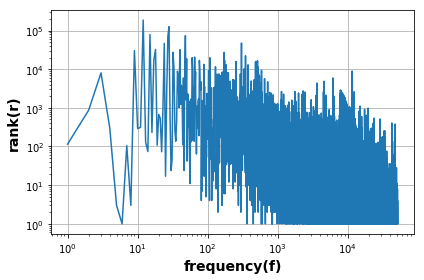

In [23]:
%matplotlib inline
from nltk.corpus import gutenberg
from nltk.probability import FreqDist
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('TkAgg')
fd = FreqDist()  # frequency distributions 빈도측정
for text in gutenberg.fileids():
    for word in gutenberg.words(text):
        fd.update([word])

        ranks ,freqs = [], []
for rank, word in enumerate(fd):
    ranks.append(rank+1)
    freqs.append(fd[word])
    
plt.xlabel('frequency(f)', fontsize=14, fontweight='bold')
plt.ylabel('rank(r)', fontsize=14, fontweight='bold')
plt.loglog(ranks, freqs);  plt.grid(True)
plt.tight_layout(); plt.show()

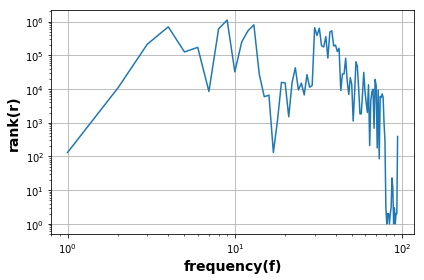

In [24]:
fd = FreqDist()  # frequency distributions 빈도측정
for text in gutenberg.fileids():
    for word in gutenberg.words(text):
        fd.update(word)

ranks ,freqs = [], []
for rank, word in enumerate(fd):
    ranks.append(rank+1)
    freqs.append(fd[word])
    
plt.xlabel('frequency(f)', fontsize=14, fontweight='bold')
plt.ylabel('rank(r)', fontsize=14, fontweight='bold')
plt.loglog(ranks, freqs); plt.grid(True)
plt.tight_layout(); plt.show()

<br></br>
## 5 유사도 측정
편집거리 알고리즘/ 자카드계수 유사척도

In [25]:
training = 'PERSON OTHER PERSON OTHER OTHER ORGANIZATION'.split()
testing = 'PERSON OTHER OTHER OTHER OTHER OTHER'.split()
trainset = set(training)
testset = set(testing)
print('trainset :', trainset,'\ntesting  :', testing)

trainset : {'PERSON', 'OTHER', 'ORGANIZATION'} 
testing  : ['PERSON', 'OTHER', 'OTHER', 'OTHER', 'OTHER', 'OTHER']


In [26]:
from __future__ import print_function
from nltk.metrics import precision, accuracy, recall, f_measure
print('precision :', precision(trainset,testset))
print('f_measure :', f_measure(trainset,testset))
print('accuracy  :', accuracy(training,testing))
print('recall    :', recall(trainset,testset))

precision : 1.0
f_measure : 0.8
accuracy  : 0.6666666666666666
recall    : 0.6666666666666666


### 01 편집거리 알고리즘
Edit Distance(Levenshtein edit distance)

삭제/ 삽입 : 비용 1, 대체/ 복사 : 비용 0

In [27]:
# 두 단어/ 문장이 같기 위해선 편집을 몇번 해야 하는지를 수치로 표시
import nltk
from nltk.metrics import edit_distance
print(edit_distance("relate","relation"))
print(edit_distance("suggestion","calculation"))

3
7


### 02 자카드 계수를 사용한 유사척도
두 set의 overlap을 통해서 유사도 측정

In [28]:
def jacc_similarity(query, document):
    first = set(query).intersection(set(document))
    second = set(query).union(set(document))
    return len(first)/len(second)

In [29]:
jacc_similarity(trainset, testset)

0.6666666666666666

### 03 이진거리 매트릭
두 라벨의 동일성을 0 ~ 1 사이의 숫자로 출력

In [30]:
# 이진거리 매트릭 함수
def binary_distance(label1, label2):
    return 0.0 if label1 == label2 else 1.0

In [31]:
binary_distance(trainset, testset)

1.0